In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import t, describe

In [2]:
# Параметры задания
n = 100  # Размер выборки
q = 1.4  # Коэффициент для расчета вероятности
degrees_of_freedom = 8  # Степени свободы для t-распределения
k = 6

In [3]:
# 1 Генерация выборки из t-распределения
sample = np.random.standard_t(degrees_of_freedom, size=n)
print("Выборка: ", sample)

Выборка:  [-0.25171442 -0.51624268 -0.73441918 -0.05555235 -0.98320577  0.19197573
 -1.39199018  0.73148411  0.24643171 -0.01733525  1.3105874   0.18097946
 -1.0451111   1.64788825  0.81355542  0.05862945 -0.81290443  0.19223342
 -1.40123015 -0.7006339  -0.35866126 -1.27228266 -0.4980988  -1.55908253
  1.07207775  0.41135708 -1.07538653 -0.18810075  0.711833   -0.42398524
  1.08987104  1.29974983  0.55124611  0.08646275 -2.4882929  -0.62640426
  1.53023065  1.98622101  1.20680237 -0.34229961  0.81316599 -0.12584698
  0.80162895  1.16222864 -0.06130206 -1.94212246 -0.49499129 -1.71807881
  3.48758345  0.26124231 -1.48931665  0.0751147  -0.04778745 -0.53853036
  0.61795323 -0.69210912 -1.1582505  -0.49803419 -0.12774785  1.28609677
  1.75955172 -0.39547772  1.01950656  0.12592869  0.18385648 -0.9435756
 -0.25743604  0.05354047 -1.22405304 -1.99136878  0.014762    0.90736907
  1.5625842   1.73401962 -0.92980941  0.47310988  1.32243084 -0.06368959
 -0.5054051   1.29692945 -0.71382932  0.44

In [4]:
# 1.1 Интервальный ряд абсолютных частот
count, bins_edges = np.histogram(sample, bins="sturges")
print("Абсолютные частоты:", count)
print("Границы интервалов:", bins_edges)
print("Сумма абсолютных частот:", sum(count))

Абсолютные частоты: [ 4 13 26 26 16 13  0  2]
Границы интервалов: [-2.4882929  -1.74130835 -0.99432381 -0.24733927  0.49964527  1.24662982
  1.99361436  2.7405989   3.48758345]
Сумма абсолютных частот: 100


In [5]:
# 1.2 Интервальный ряд относительных частот
count_rel, bins_edges_rel = np.histogram(sample, bins="sturges", density=True)
interval_width = bins_edges_rel[1] - bins_edges_rel[0]
print("Относительные частоты:", count_rel)
print("Сумма относительных частот:", sum(count_rel * interval_width))
print("Длина интервала абсолютных частот:", interval_width)

Относительные частоты: [0.05354863 0.17403305 0.3480661  0.3480661  0.21419453 0.17403305
 0.         0.02677432]
Сумма относительных частот: 0.9999999999999999
Длина интервала абсолютных частот: 0.7469845428106983


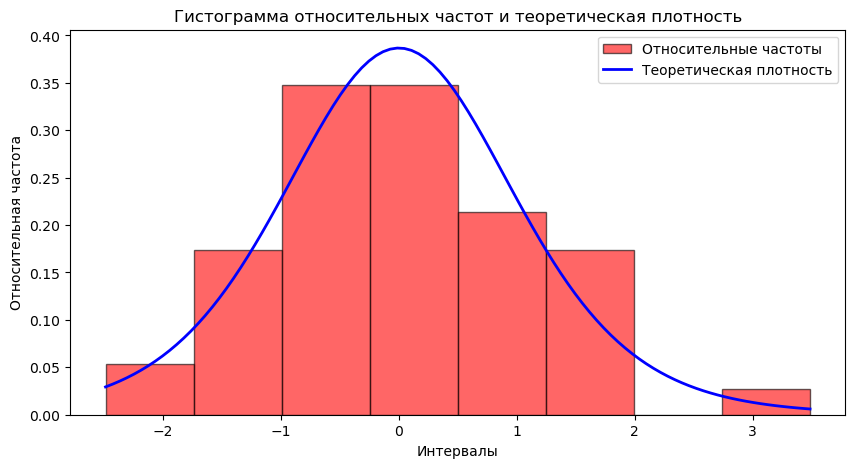

In [6]:
# 2.1 Гистограмма относительных частот и теоретическая плотность
plt.figure(figsize=(10, 5))
plt.hist(sample, bins="sturges", density=True, color="red", edgecolor="black", alpha=0.6, label="Относительные частоты")
x_vals = np.linspace(min(bins_edges), max(bins_edges), 100)
y_vals = t.pdf(x_vals, degrees_of_freedom)
plt.plot(x_vals, y_vals, color="blue", linewidth=2, label="Теоретическая плотность")
plt.title("Гистограмма относительных частот и теоретическая плотность")
plt.xlabel("Интервалы")
plt.ylabel("Относительная частота")
plt.legend()
plt.show()

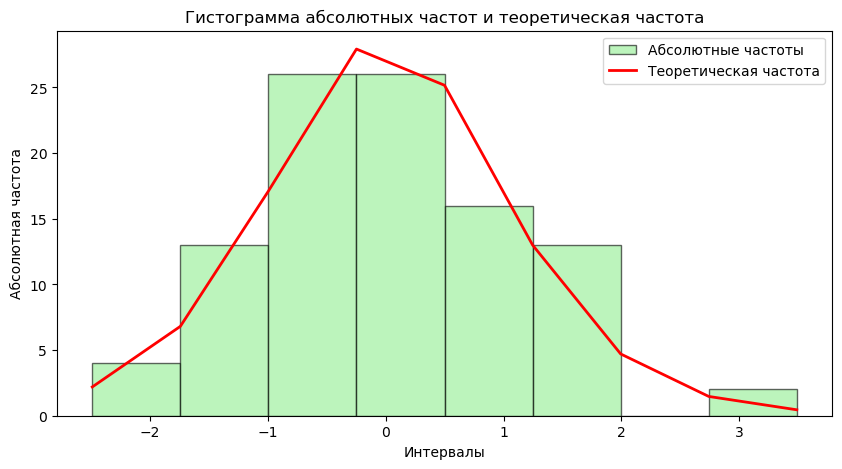

In [7]:
# 2.2 Гистограмма абсолютных частот и теоретическая частота
plt.figure(figsize=(10, 5))
plt.hist(sample, bins="sturges", color="lightgreen", edgecolor="black", alpha=0.6, label="Абсолютные частоты")
avs = t.pdf(bins_edges, degrees_of_freedom) * n * interval_width
plt.plot(bins_edges, avs, color="red", linewidth=2, label="Теоретическая частота")
plt.title("Гистограмма абсолютных частот и теоретическая частота")
plt.xlabel("Интервалы")
plt.ylabel("Абсолютная частота")
plt.legend()
plt.show()

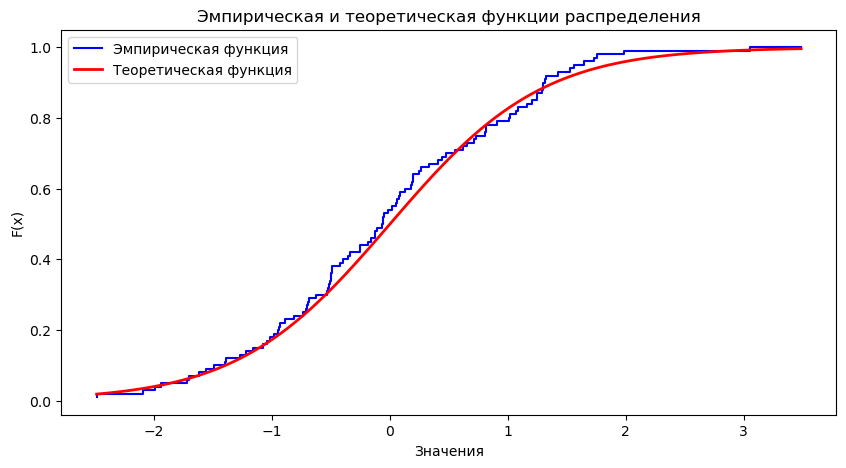

In [8]:

# 2.3 Эмпирическая и теоретическая функции распределения
plt.figure(figsize=(10, 5))
sorted_sample = np.sort(sample)
empirical_cdf = np.arange(1, n+1) / n
plt.step(sorted_sample, empirical_cdf, color="blue", label="Эмпирическая функция")
plt.plot(x_vals, t.cdf(x_vals, degrees_of_freedom), color="red", linewidth=2, label="Теоретическая функция")
plt.title("Эмпирическая и теоретическая функции распределения")
plt.xlabel("Значения")
plt.ylabel("F(x)")
plt.legend()
plt.show()

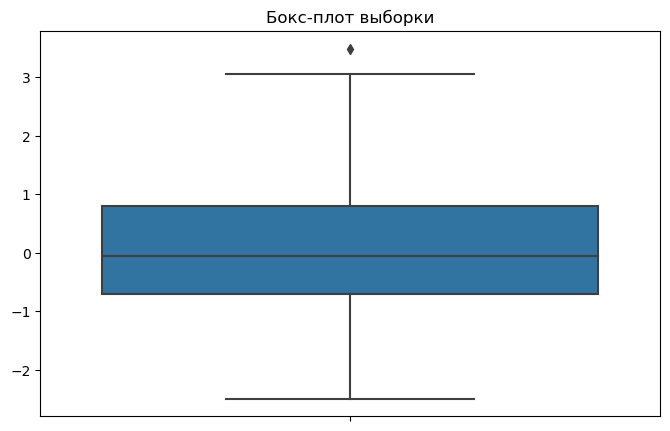

In [9]:
# 2.4 Бокс-плот выборки
plt.figure(figsize=(8, 5))
sb.boxplot(y=sample)
plt.title("Бокс-плот выборки")
plt.show()

In [10]:
iqr = np.percentile(sample, 75) - np.percentile(sample, 25)
lower_bound = np.percentile(sample, 25) - 1.5 * iqr
upper_bound = np.percentile(sample, 75) + 1.5 * iqr
theoretical_outliers = sum((sample < lower_bound) | (sample > upper_bound))
print("Число выбросов:", theoretical_outliers)
print("Теоретическое число выбросов ПРИ НОРМАЛЬНОМ РАСПРЕДЕЛЕНИИ ", 0.05*n)

Число выбросов: 1
Теоретическое число выбросов ПРИ НОРМАЛЬНОМ РАСПРЕДЕЛЕНИИ  5.0


In [11]:
# 3. Ответы на вопросы
interval_start = bins_edges[k-1]
interval_end = bins_edges[k]

# Оценка вероятности попадания в k-й интервал
probability_in_kth_interval = (count[k-1] * (interval_end - interval_start))
print(f"Оценка вероятности попадания значений в {k}-й интервал: {probability_in_kth_interval}")

theoretical_probability_in_kth_interval = t.cdf(interval_end, degrees_of_freedom) - t.cdf(interval_start, degrees_of_freedom)
print(f"Теоретическая вероятность попадания значений в {k}-й интервал: {theoretical_probability_in_kth_interval}")


Оценка вероятности попадания значений в 6-й интервал: 9.710799056539086
Теоретическая вероятность попадания значений в 6-й интервал: 0.08323973255413852


In [12]:
# 4. Расчет вероятности P(*)
p_theoretical = t.cdf(q*np.sqrt(degrees_of_freedom/(degrees_of_freedom-2)), degrees_of_freedom) - t.cdf(-q*np.sqrt(degrees_of_freedom/(degrees_of_freedom-2)), degrees_of_freedom)
print("Теоретическая вероятность P(*) по формуле:", p_theoretical)

count_in_interval = np.sum((sample >= -q*np.sqrt(degrees_of_freedom/(degrees_of_freedom-2))) & (sample <= q*np.sqrt(degrees_of_freedom/(degrees_of_freedom-2))))
estimated_probability = count_in_interval / n
print(f"Оценка вероятности по выборке для n={n}: {estimated_probability}")

# 4.3 Увеличение объема выборки
large_sample = np.random.standard_t(degrees_of_freedom, size=50 * n)
count_in_interval_large = np.sum((large_sample >= -q*np.sqrt(degrees_of_freedom/(degrees_of_freedom-2))) & (large_sample <= q*np.sqrt(degrees_of_freedom/(degrees_of_freedom-2))))
estimated_probability_large = count_in_interval_large / (50*n)

print(f"Оценка вероятности по выборке для n={50*n}: {estimated_probability_large}")


Теоретическая вероятность P(*) по формуле: 0.8553689888452527
Оценка вероятности по выборке для n=100: 0.87
Оценка вероятности по выборке для n=5000: 0.8596


In [13]:
# 5. Точечные оценки параметров распределения
mean_estimate = np.mean(sample)
median_estimate = np.median(sample)
variance_estimate = np.var(sample, ddof=1)
std_dev_estimate = np.std(sample, ddof=1)
skewness_estimate = ((sample - mean_estimate) ** 3).mean() / (std_dev_estimate ** 3)
kurtosis_estimate = ((sample - mean_estimate) ** 4).mean() / (std_dev_estimate ** 4) - 3


In [14]:
print("Оценка мат. ожидания: ", mean_estimate)
print("Медиана: ", median_estimate)
print("Дисперсия:", variance_estimate)
print("Стандартное отклонение:", std_dev_estimate)
print("Асимметрия:", skewness_estimate)
print("Эксцесс:", kurtosis_estimate)

Оценка мат. ожидания:  0.007775267230531619
Медиана:  -0.058427202202264335
Дисперсия: 1.2096508089702307
Стандартное отклонение: 1.09984126535161
Асимметрия: 0.3369536601318402
Эксцесс: 0.20103348856667402


In [15]:
# Использование scipy для проверки результатов
desc_stats = describe(sample)
print("Результаты describe():")
print("Оценка мат. ожидания:", desc_stats.mean)
print("Дисперсия:", desc_stats.variance)
print("Асимметрия:", desc_stats.skewness)
print("Эксцесс:", desc_stats.kurtosis)

Результаты describe():
Оценка мат. ожидания: 0.007775267230531619
Дисперсия: 1.209650808970231
Асимметрия: 0.3420718893156562
Эксцесс: 0.26602743451349165


In [16]:
# Повторное вычисление с увеличенной выборкой
large_mean_estimate = np.mean(large_sample)
large_median_estimate = np.median(large_sample)
large_variance_estimate = np.var(large_sample, ddof=1)
large_skewness_estimate = ((large_sample - large_mean_estimate) ** 3).mean() / np.std(large_sample)**3
large_kurtosis_estimate = ((large_sample - large_mean_estimate) ** 4).mean() / np.std(large_sample)**4 - 3


In [17]:
print("Оценки для увеличенной выборки:")
print("Оценка мат. ожидания:", large_mean_estimate)
print("Медиана: ", large_median_estimate)
print("Дисперсия:", large_variance_estimate)
print("Ассиметрия:", large_skewness_estimate)
print("Эксцесс:", large_kurtosis_estimate)

Оценки для увеличенной выборки:
Оценка мат. ожидания: -0.008470484189167139
Медиана:  0.01463137639326214
Дисперсия: 1.3105498653956835
Ассиметрия: -0.06402314491634749
Эксцесс: 1.4875265370279918
